# Pymaceuticals Inc.
---

### Analysis

3 Observations:

1. Mice treated with Capomulin and Ramicane were more likely to start with smaller tumour volumes than the other groups. 
2.For mouse s185, tumour volume decreased with time when on Capomulin. 
3. Mouse weight is positively correlated with tumor volume. 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
print(number_of_mice)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint

duplicates = combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])

# Filtering the data to show only duplicate entries
duplicate_mice = combined_data[duplicates]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_timepoints = duplicate_mice['Timepoint'].unique()

# Extracting the unique Mouse IDs that have duplicates
print(duplicate_mouse_ids)
print(duplicate_timepoints)

['g989']
[ 0  5 10 15 20]


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# Identifying the duplicate rows based on Mouse ID and Timepoint
duplicates = combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Filtering the data to show only duplicate entries
duplicate_mice = combined_data[duplicates]

# Extracting the unique Mouse IDs that have duplicates
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Filtering the original dataset for all data related to the duplicate Mouse IDs
all_duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Displaying all data for the duplicate mouse IDs
all_duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Extracting the unique Mouse IDs that have duplicates
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Creating a clean DataFrame by dropping all data for the duplicate mouse IDs
clean_df = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Displaying the clean DataFrame
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = clean_df['Mouse ID'].nunique()

# Printing the number of unique mice
print("Number of unique mice in the clean DataFrame:", unique_mice_count)


Number of unique mice in the clean DataFrame: 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Grouping the data by drug regimen
grouped_data = clean_df.groupby('Drug Regimen')

# Calculating the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = grouped_data['Tumor Volume (mm3)'].mean()
median = grouped_data['Tumor Volume (mm3)'].median()
variance = grouped_data['Tumor Volume (mm3)'].var()
std_dev = grouped_data['Tumor Volume (mm3)'].std()
sem = grouped_data['Tumor Volume (mm3)'].sem()

# Assembling the results into a single summary DataFrame
summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std_dev,
    "Tumor Volume SEM": sem
})

# Displaying the summary DataFrame
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


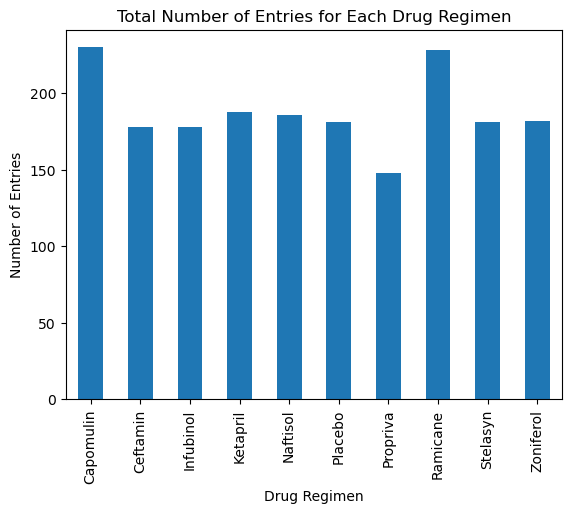

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Grouping the data by 'Regimen' and counting the number of entries for each
regimen_count = clean_df.groupby('Drug Regimen').count()['Mouse ID']

# Generating a bar plot using Pandas
regimen_count.plot(kind='bar', title='Total Number of Entries for Each Drug Regimen')

# Adding labels to the plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Entries')
plt.show()


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


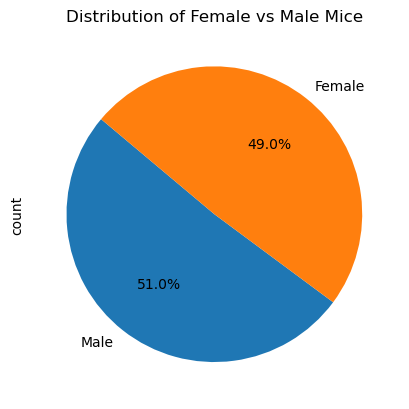

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Counting the number of female and male mice
gender_distribution = clean_df['Sex'].value_counts()

# Generating a pie plot using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, title='Distribution of Female vs Male Mice')

# Displaying the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_df[clean_df['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint, filtered_df, on=['Mouse ID', 'Timepoint'], how='left')

# Display the merged DataFrame
merged_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [15]:
# Step 1: Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 2: Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Step 3: Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # Add subset 
    tumor_vol_data.append(final_tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f"IQR for {treatment}: {iqr}")

    # Determine bounds for potential outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Identify outliers
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"Potential outliers for {treatment}: {outliers}")



IQR for Capomulin: 7.781863460000004
Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Ramicane: 9.098536719999998
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Infubinol: 11.477135160000003
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
IQR for Ceftamin: 15.577752179999997
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


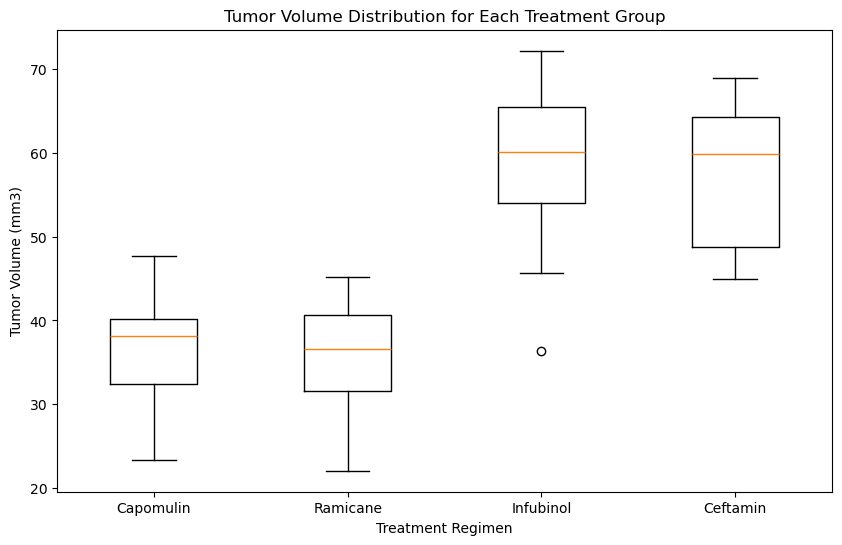

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title('Tumor Volume Distribution for Each Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Treatment Regimen')
plt.show()

## Line and Scatter Plots

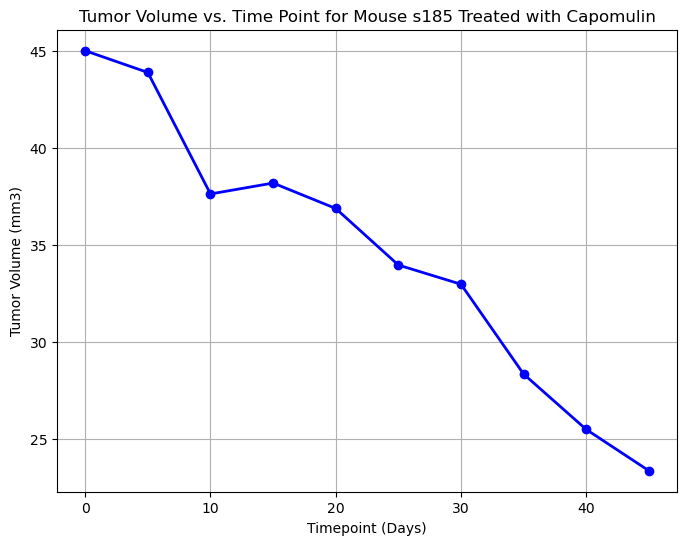

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a mouse treated with Capomulin
capomulin_mice = clean_df[clean_df['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()
selected_mouse = capomulin_mice[0]  # You can choose any index or specify a mouse ID directly

# Extract data for the selected mouse
mouse_data = clean_df[(clean_df['Mouse ID'] == selected_mouse) & (clean_df['Drug Regimen'] == 'Capomulin')]

# Generate the line plot
plt.figure(figsize=(8, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse} Treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


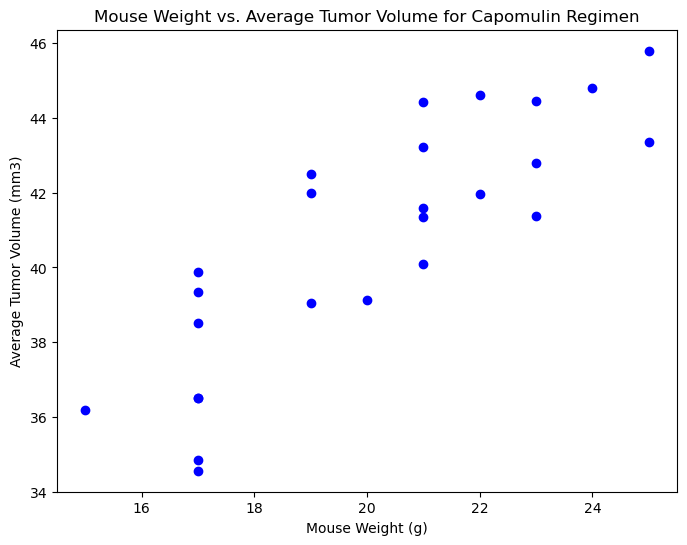

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Step 1: Filter the dataset for the Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Step 2: Group by mouse ID and calculate the average tumor volume
average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Step 3: Merge this with the mouse weight data
# Assuming the mouse weight is in a column named 'Weight (g)'
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
merged_data = pd.DataFrame({'Average Tumor Volume': average_tumor_vol, 'Mouse Weight': mouse_weight})

# Step 4: Generate a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Mouse Weight'], merged_data['Average Tumor Volume'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


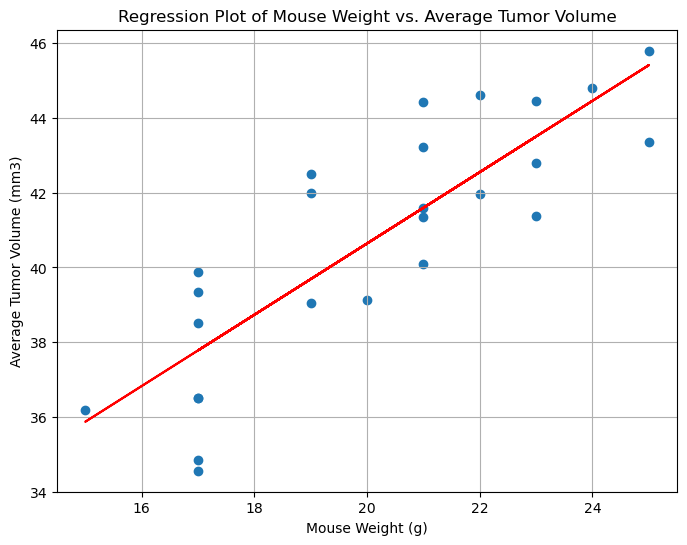

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(merged_data['Mouse Weight'], merged_data['Average Tumor Volume'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation[0]:.2f}")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(merged_data['Mouse Weight'], merged_data['Average Tumor Volume'])

# Calculate the regression values
regress_values = merged_data['Mouse Weight'] * slope + intercept

# Create a scatter plot and plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Mouse Weight'], merged_data['Average Tumor Volume'])
plt.plot(merged_data['Mouse Weight'], regress_values, "r-")
plt.title('Regression Plot of Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()